<h1 align="center"><font color="yellow">Pesquisa Semântica para Iniciantes com <font color="red">qdrant</font></font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Links de estudos:

* [qdrant](https://qdrant.tech/documentation/tutorials/search-beginners/?source=post_page-----3c7e3b1e4976--------------------------------)

* [Retrieval Augmented Generation using Qdrant HuggingFace embeddings and Langchain and Evaluate the Response Generated using OpenAI](https://medium.aiplanet.com/retrieval-augmented-generation-using-qdrant-huggingface-embeddings-and-langchain-and-evaluate-the-3c7e3b1e4976)

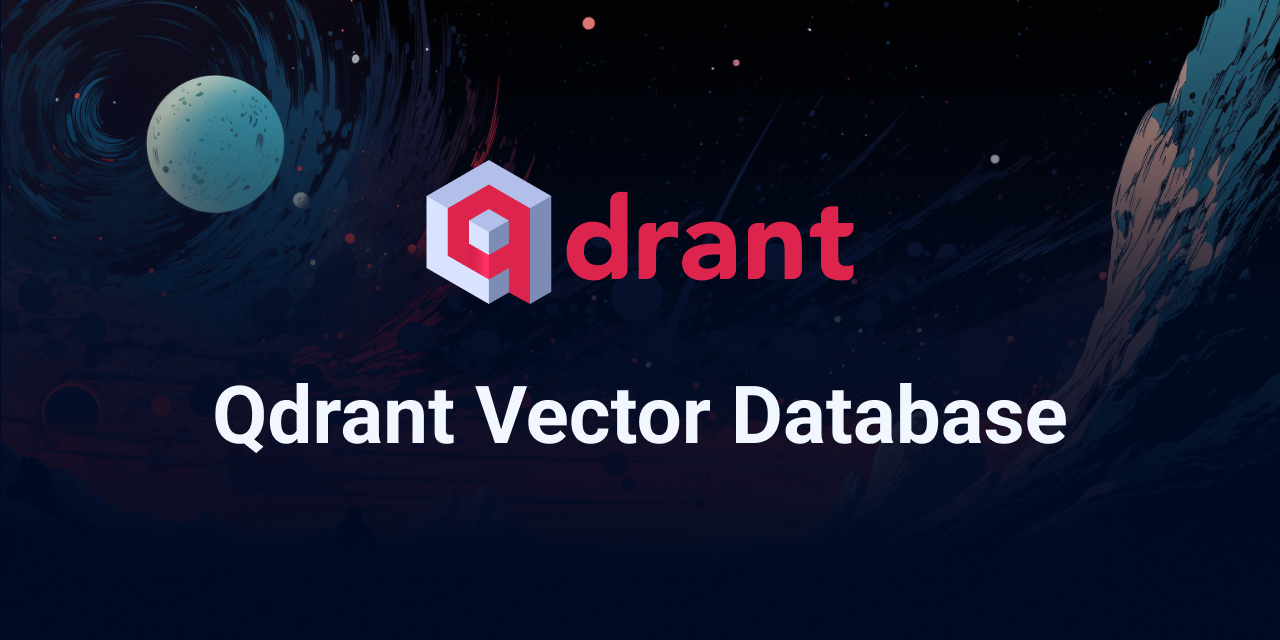

<font color="orange"> `Qdrant` permite armazenar dados como `Embeddings`. Você também pode usar o `Qdrant` para executar consultas de pesquisa nesses dados. Isso significa que você pode pedir ao mecanismo que forneça respostas relevantes que vão muito além da correspondência de `palavras-chave`.</font>

# Setup

In [9]:
!python --version

Python 3.10.12


In [ ]:
#%pip install -U sentence-transformers

#%pip install qdrant-client

<font color="orange">Uma vez definidas as duas estruturas principais, você precisa especificar os modelos exatos que este mecanismo usará.</font>

In [13]:
from qdrant_client import models, QdrantClient
from sentence_transformers import SentenceTransformer # Contém os Modelos de Embeddings.


encoder = SentenceTransformer('all-MiniLM-L6-v2') 

# Dataset

<font color="orange">`all-MiniLM-L6-v2` codificará (`Encode`) os dados que você fornecer. Aqui você listará todos os livros de ficção científica da sua biblioteca. Cada livro possui `metadados`: nome, autor, ano de publicação e uma breve descrição.</font>

In [14]:
documents = [
{ "name": "The Time Machine", "description": "Um homem viaja no tempo e testemunha a evolução da humanidade.", "author": "H.G. Wells", "year": 1895 },
{ "name": "Ender's Game", "description": "Um menino é treinado para se tornar um líder militar em uma guerra contra uma raça alienígena.", "author": "Orson Scott Card", "year": 1985 },
{ "name": "Brave New World", "description": "Uma sociedade distópica onde as pessoas são geneticamente modificadas e condicionadas para se conformarem a uma hierarquia social estrita.", "author": "Aldous Huxley", "year": 1932 },
{ "name": "The Hitchhiker's Guide to the Galaxy", "description": "Uma série cômica de ficção científica que segue as desventuras de um humano involuntário e seu amigo alienígena.", "author": "Douglas Adams", "year": 1979 },
{ "name": "Dune", "description": "Um planeta deserto é palco de intrigas políticas e lutas pelo poder.", "author": "Frank Herbert", "year": 1965 },
{ "name": "Foundation", "description": "Um matemático desenvolve uma ciência para prever o futuro da humanidade e trabalha para salvar a civilização do colapso.", "author": "Isaac Asimov", "year": 1951 },
{ "name": "Snow Crash", "description": "Um mundo futurista onde a internet evoluiu para um metaverso de realidade virtual.", "author": "Neal Stephenson", "year": 1992 },
{ "name": "Neuromancer", "description": "Um hacker é contratado para realizar um hack quase impossível e é puxado para uma teia de intrigas.", "author": "William Gibson", "year": 1984 },
{ "name": "The War of the Worlds", "description": "Uma invasão marciana da Terra lança a humanidade no caos.", "author": "H.G. Wells", "year": 1898 },
{ "name": "The Hunger Games", "description": "Uma sociedade distópica onde adolescentes são forçados a lutar até a morte em um espetáculo televisivo.", "author": "Suzanne Collins", "year": 2008 },
{ "name": "The Andromeda Strain", "description": "Um vírus mortal vindo do espaço sideral ameaça exterminar a humanidade.", "author": "Michael Crichton", "year": 1969 },
{ "name": "The Left Hand of Darkness", "description": "Um embaixador humano é enviado a um planeta onde os habitantes não têm género e podem mudar de género à vontade.", "author": "Ursula K. Le Guin", "year": 1969 },
{ "name": "The Three-Body Problem", "description": "Os humanos encontram uma civilização alienígena que vive em um sistema moribundo.", "author": "Liu Cixin", "year": 2008 }
]

# Defina o local de armazenamento

<font color="orange">Você precisa informar ao `Qdrant` onde armazenar os `Embeddings`. Esta é uma demonstração básica, portanto seu computador local usará sua memória como armazenamento temporário.</font>

In [15]:
qdrant = QdrantClient(":memory:") 

# Criamos uma coleção

<font color="orange">Todos os dados no `Qdrant` são organizados por `coleções`. Nesse caso, você está armazenando livros, por isso chamamos isso de `Eddy_my_books`.</font>

In [17]:
qdrant.recreate_collection(collection_name="Eddy_my_books",
                           vectors_config=models.VectorParams(size=encoder.get_sentence_embedding_dimension(), # Tamanho do vetor é definido pelo modelo
		                                                      distance=models.Distance.COSINE
	                                                         )
                          )



True

* Use `recreate_collection` se estiver experimentando e executando o script várias vezes. Esta função tentará primeiro remover uma coleção existente com o mesmo nome.

* O parâmetro `vector_size` define o tamanho dos vetores para uma coleção específica. Se o tamanho for diferente, é impossível calcular a distância entre eles. $384$ é a dimensionalidade de saída do codificador (`Encoder`). Você também pode usar `model.get_sentence_embedding_dimension()` para obter a dimensionalidade do modelo que está usando.

* O parâmetro `distance` permite especificar a função usada para medir a distância entre dois pontos.

# Upload dos Dados para a Collection

<font color="orange">Diga ao banco de dados para fazer upload documents para a coleção `Eddy_my_books`. Isso dará a cada registro um `ID` e uma carga útil. A carga útil são apenas os `metadados` do conjunto de dados.</font>

In [18]:
qdrant.upload_records(collection_name="Eddy_my_books",
                      records=[models.Record(id=idx,
                                             vector=encoder.encode(doc["description"]).tolist(),
                                             payload=doc) 
                                             
											 for idx, doc in enumerate(documents)
	                          ]
                     )


# Faça uma pergunta ao Motor (`Engine`)

<font color="orange">Agora que os dados estão armazenados no `Qdrant`, você pode fazer perguntas e receber resultados `semanticamente relevantes`.</font>

In [22]:
hits = qdrant.search(collection_name="Eddy_my_books",
					 query_vector=encoder.encode("invasão alienígena").tolist(),
					 limit=3
                    )
for hit in hits:
    print(hit.payload, "score:", hit.score)
    

{'name': 'The War of the Worlds', 'description': 'Uma invasão marciana da Terra lança a humanidade no caos.', 'author': 'H.G. Wells', 'year': 1898} score: 0.5464040515306736
{'name': "The Hitchhiker's Guide to the Galaxy", 'description': 'Uma série cômica de ficção científica que segue as desventuras de um humano involuntário e seu amigo alienígena.', 'author': 'Douglas Adams', 'year': 1979} score: 0.4524966427548881
{'name': 'The Three-Body Problem', 'description': 'Os humanos encontram uma civilização alienígena que vive em um sistema moribundo.', 'author': 'Liu Cixin', 'year': 2008} score: 0.43991679718293697


O mecanismo de busca mostra três das respostas mais prováveis ​​que têm a ver com a `invasão alienígena`. Cada uma das respostas recebe uma pontuação para mostrar o <font color="yellow">quão próxima a resposta está da pergunta original</font>.

## Limite a consulta

<font color="orange">Que tal o livro mais recente do início dos anos `2000`?</font>

In [26]:
hits = qdrant.search(collection_name="Eddy_my_books",
					 query_vector=encoder.encode("invasão alienígena").tolist(),
					 query_filter=models.Filter(must=[models.FieldCondition(key="year",
															                range=models.Range(gte=2000)
			                                                               )
		                                             ]
	                                           ),
					 limit=1
                    )

for hit in hits:
	print(hit.payload, "score:", hit.score)


{'name': 'The Three-Body Problem', 'description': 'Os humanos encontram uma civilização alienígena que vive em um sistema moribundo.', 'author': 'Liu Cixin', 'year': 2008} score: 0.43991679718293697
